In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
from google.colab import files
uploaded = files.upload()


Saving sonardata.csv to sonardata.csv


In [0]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')

In [0]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [0]:
df.shape #4 input values y el classifier

(1371, 5)

In [0]:
X = df.iloc[:, 0:4]
X.shape

(1371, 4)

In [0]:
Y = df.iloc[:,4]
Y.shape


(1371,)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1096, 4)
(1096,)
(275, 4)
(275,)


In [0]:
i = Input(shape=x_train[0].shape)
x = Dense(128, activation='relu',kernel_regularizer='l2')(i)
x = Dropout(0.1)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

opt = tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000)

Epoch 1/1000
35/35 [==============================] - 0s 7ms/step - loss: 0.3442 - accuracy: 0.8869 - val_loss: 0.1402 - val_accuracy: 0.9891
Epoch 2/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.9781 - val_loss: 0.0923 - val_accuracy: 0.9891
Epoch 3/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9763 - val_loss: 0.0873 - val_accuracy: 0.9855
Epoch 4/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9827 - val_loss: 0.0720 - val_accuracy: 0.9891
Epoch 5/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0810 - accuracy: 0.9854 - val_loss: 0.0730 - val_accuracy: 0.9891
Epoch 6/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9845 - val_loss: 0.0611 - val_accuracy: 0.9964
Epoch 7/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9799 - val_loss: 0.0613 - val_accuracy: 0.9964
Epoch 

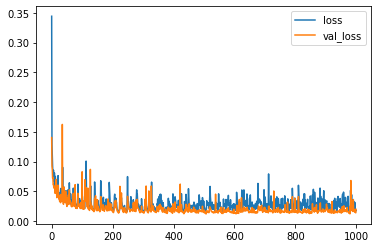

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

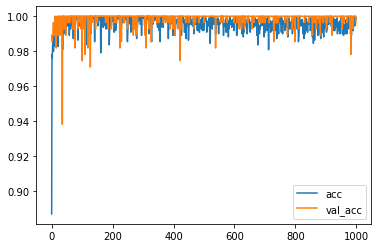

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend() #hermoso